# Prediction of mass by using the scalar field and position

Two models, one dense, one convolutional attempt to predict the mass of particles moving in a force field.  

The Dense model works on a dataset with 50 different fields and 2000 simulations across them. It achieves about 0.7 correlation. And is only able to predict the mean when using the full dataset.

The Convolutional model works on a dataset with 2000 fields and one simulation per field. 

#### Imports

In [518]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.losses as kls

In [3]:
from dataset import DataBuilder, final_positions_hist, plot_field
from FFNN_models import CNN, DenseNN

In [4]:
%load_ext autoreload
%autoreload 2

## Dataset production
Field has shape (32,32) by default. 

In [5]:
data = DataBuilder(sim_steps=200, downsize=True)

### Dataset with summed positions

In [ ]:
x, y = data.build_summed_pos(samples=15000,sim_steps=100)


In [ ]:
x_train = x[:14000]
y_train = y[:14000]
x_test = x[14000:]
y_test = y[14000:]

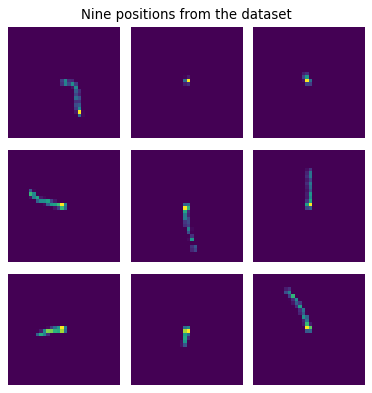

In [591]:
plot_field(nine_fields=x_train[:9], pos=1, title="Nine positions from the dataset", dpi=80)
plt.show()

## Convolutional model on summed positions 

In [ ]:
ConvNN = CNN(name="CNN", loss=kls.Huber(delta=0.2))
ConvNN.set_dataset(x_train, y_train, x_test, y_test)

In [606]:
ConvNN.train(2,1, verbose=1, val_split=0.001)

4496/4496 [==============================] - 12s 3ms/step - loss: 0.0207 - val_loss: 0.0110


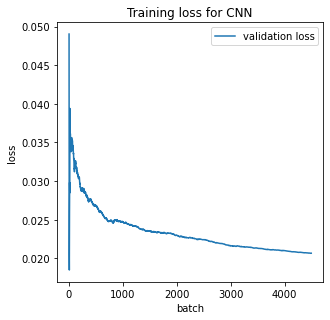

In [607]:
ConvNN.plot_training(legend=["validation loss"])
plt.show()

In [608]:
ConvNN.predict()

No handles with labels found to put in legend.


MSE score of model:  0.03895610139739272
R2 score of model:  0.4170367579575276
Normalised covariance between predicted and actual mass is 0.6493665768600545


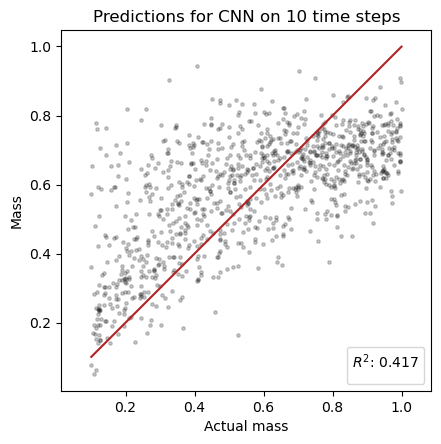

In [609]:
fig, ax = plt.subplots(dpi=100)
ConvNN.plot_test(fig=fig, ax=ax, title="Predictions for CNN on 10 time steps")
plt.show()

## Dense model on summed positions

In [610]:
DNN = DenseNN(name="DNN", loss=kls.Huber(delta=0.2))

In [611]:
DNN.set_dataset(x_train, y_train, x_test, y_test)

In [612]:
DNN.train(2,1,verbose=1, val_split=0.1)

4050/4050 [==============================] - 6s 2ms/step - loss: 0.0243 - val_loss: 0.0229


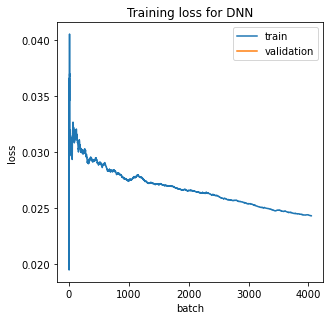

In [613]:
DNN.plot_training()
plt.show()

In [616]:
DNN.predict(pred_on_train=True)

No handles with labels found to put in legend.


MSE score of model:  0.05122389808428704
R2 score of model:  0.24227490014299569
Normalised covariance between predicted and actual mass is 0.5990797102213263


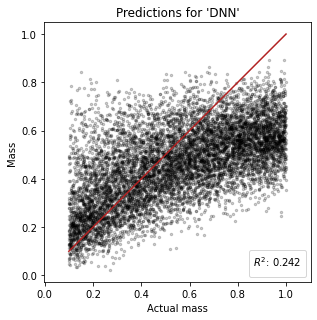

In [617]:
DNN.plot_test()
plt.show()

No handles with labels found to put in legend.


MSE score of model:  0.05482995416789314
R2 score of model:  0.17949058822158082
Normalised covariance between predicted and actual mass is 0.581955673552905


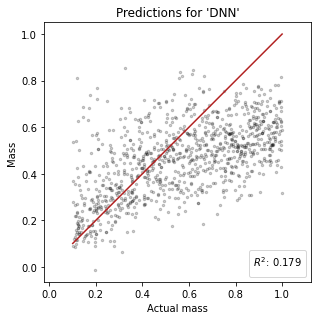

In [618]:
DNN.predict()
DNN.plot_test()
plt.show()

## Comparison of models

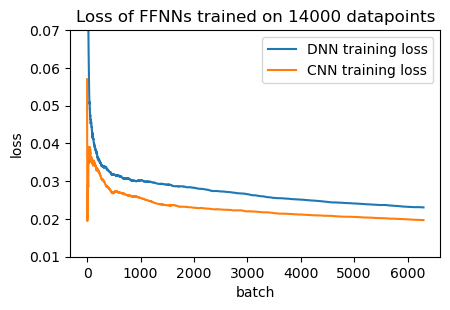

In [572]:
fig, ax = plt.subplots(dpi=100, figsize=(4.7747,3))
DNN.plot_training(fig, ax, legend=["CNN training loss"], both=False)
ConvNN.plot_training(fig, ax, title="Loss of FFNNs trained on 14000 datapoints",
                     legend=["DNN training loss",
                             "CNN training loss"],both=False)
plt.ylim((0.01,0.07))
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MSE score of model:  0.03711236983096613
R2 score of model:  0.4446274996607522
Normalised covariance between predicted and actual mass is 0.6698883046201536
MSE score of model:  0.03986414818793112
R2 score of model:  0.4034481830758031
Normalised covariance between predicted and actual mass is 0.6375721255379948


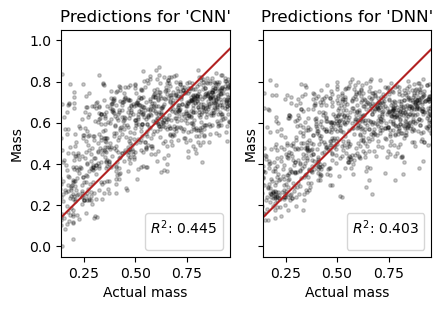

In [571]:
fig, ax = plt.subplots(1,2, dpi=100, figsize=(4.7747, 3), sharey=True)
ConvNN.plot_test(fig=fig, ax=ax[0])
DNN.plot_test(fig=fig, ax=ax[1])
plt.show()

### Variance analysis

In [478]:
n = 40
DNN_R2 = np.zeros(n)
DNN_mse = np.zeros(n)
CNN_R2 = np.zeros(n)
CNN_mse = np.zeros(n)
models_CNN = []
models_DNN = []
for i in range(n):
    print("Models trained: ", i)
    DNN_avg = DenseNN(name=str(i)+"_D")
    CNN_avg = CNN(name=str(i)+"_C")
    DNN_avg.set_dataset(x_train, y_train, x_test, y_test)
    CNN_avg.set_dataset(x_train, y_train, x_test, y_test)
    print("DNN: ")
    DNN_avg.train(2,1, val_split=0.01, verbose=1)
    DNN_avg.predict()
    DNN_R2[i] = DNN_avg.r2
    DNN_mse[i]= DNN_avg.mse
    print("CNN: ")
    CNN_avg.train(2,1, val_split=0.01, verbose=1)
    CNN_avg.predict()
    CNN_R2[i] = CNN_avg.r2
    CNN_mse[i]= CNN_avg.mse
print("Models trained: ", i+1)

print(f"Average R2 of {n} dense models: {DNN_R2.mean()}")
print(f"Average MSE of {n} dense models: {DNN_mse.mean()}")
print(f"Average R2 of {n} convolutional models: {CNN_R2.mean()}")
print(f"Average MSE of {n} convolutional models: {CNN_mse.mean()}")

Models trained:  0
DNN: 
6930/6930 [==============================] - 10s 2ms/step - loss: 0.0537 - val_loss: 0.0501
CNN: 
6930/6930 [==============================] - 16s 2ms/step - loss: 0.3679 - val_loss: 0.3482
Models trained:  1
DNN: 
6930/6930 [==============================] - 10s 1ms/step - loss: 0.0526 - val_loss: 0.0473
CNN: 
6930/6930 [==============================] - 16s 2ms/step - loss: 0.3679 - val_loss: 0.3482
Models trained:  2
DNN: 
6930/6930 [==============================] - 12s 2ms/step - loss: 0.0529 - val_loss: 0.0494
CNN: 
6930/6930 [==============================] - 17s 2ms/step - loss: 0.0480 - val_loss: 0.0489
Models trained:  3
DNN: 
6930/6930 [==============================] - 10s 1ms/step - loss: 0.0528 - val_loss: 0.0440
CNN: 
6930/6930 [==============================] - 15s 2ms/step - loss: 0.3679 - val_loss: 0.3482
Models trained:  4
DNN: 
6930/6930 [==============================] - 11s 2ms/step - loss: 0.0571 - val_loss: 0.0446
CNN: 
6930/6930 [======

In [490]:
CNN_R2 = CNN_R2[np.where(CNN_R2>0)]
print("Removed",n-CNN_R2.shape[0], "CNN models")

Removed 11 CNN models


In [564]:
print("Average MSE DNN:", DNN_mse.mean())
print("Average MSE CNN:", CNN_mse[np.where(CNN_mse<0.1)].mean())

Average MSE DNN: 0.043132151958477104
Average MSE CNN: 0.0391402291030914


In [566]:
print("Average R2 DNN:", DNN_R2.mean())
print("Average R2 CNN:", CNN_R2.mean())

Average R2 DNN: 0.37284102455860396
Average R2 CNN: 0.40804315567089555


[]

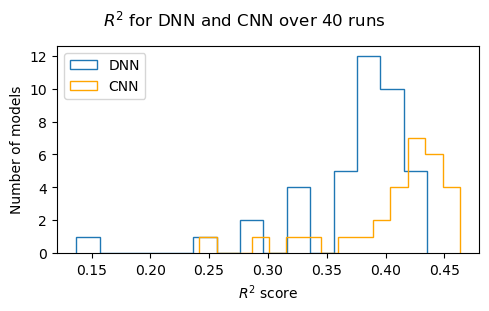

In [570]:
fig, axs = plt.subplots(1,1, figsize=(4.7747, 3), dpi=100, constrained_layout=True)
axs.hist(DNN_R2, label="DNN", histtype="step", bins=15)
axs.hist(CNN_R2, label="CNN", color="orange", histtype="step", bins=15)
axs.legend(loc="upper left")
fig.suptitle("$R^2$ for DNN and CNN over 40 runs")
plt.xlabel("$R^2$ score")
plt.ylabel("Number of models")
plt.plot()